In [ ]:
!unzip drive/MyDrive/archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_loader = img_gen.flow_from_directory(
    directory = "seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42, )

test_loader = img_gen.flow_from_directory(
    directory = "seg_test/seg_test", target_size = (128, 128), batch_size = 50, seed = 42, )

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
idx_to_classes = {val:key for key,val in dict(train_loader.class_indices).items()}

In [ ]:
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [ ]:
model = Sequential()
#Covolution 1
model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = "relu",
                 input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Covolution 2
model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = "relu"))
model.add(AvgPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully connected layers
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(6, activation = "softmax"))

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
#Steps
train_steps = len(train_loader) # = (round(total_train_images / batch_size))
test_steps = len(test_loader) # = (round(total_test_images / batch_size))

In [ ]:
train_metrics = model.fit_generator(
    generator = train_loader,
    steps_per_epoch=train_steps,
    epochs = 20,
    validation_data = test_loader,
    validation_steps = test_steps)

Epoch 1/20


<ipython-input-16-be27086e3da4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(


281/281 [==============================] - 227s 806ms/step - loss: 0.4299 - accuracy: 0.8442 - val_loss: 0.6515 - val_accuracy: 0.7773
Epoch 2/20
281/281 [==============================] - 223s 793ms/step - loss: 0.3761 - accuracy: 0.8678 - val_loss: 0.5546 - val_accuracy: 0.8190
Epoch 3/20
281/281 [==============================] - 222s 788ms/step - loss: 0.3378 - accuracy: 0.8798 - val_loss: 0.5114 - val_accuracy: 0.8383
Epoch 4/20
281/281 [==============================] - 223s 793ms/step - loss: 0.2998 - accuracy: 0.8927 - val_loss: 0.6749 - val_accuracy: 0.7900
Epoch 5/20
281/281 [==============================] - 224s 798ms/step - loss: 0.2714 - accuracy: 0.9029 - val_loss: 0.8224 - val_accuracy: 0.7523
Epoch 6/20
281/281 [==============================] - 221s 785ms/step - loss: 0.2477 - accuracy: 0.9101 - val_loss: 0.5383 - val_accuracy: 0.8280
Epoch 7/20
281/281 [==============================] - 227s 808ms/step - loss: 0.2266 - accuracy: 0.9182 - val_loss: 1.0644 - val_accura

In [ ]:
# Evaluate and print the augmented model results
augmented_model_evaluation = model.evaluate(test_loader, steps=test_steps)
print("Model Evaluation - Loss: {:.4f}, Accuracy: {:.4f}".format(
    augmented_model_evaluation[0], augmented_model_evaluation[1]))

60/60 [==============================] - 18s 287ms/step - loss: 0.8549 - accuracy: 0.8087
Model Evaluation - Loss: 0.8549, Accuracy: 0.8087


In [ ]:
train_loss = train_metrics.history["loss"]
train_accuracy = train_metrics.history["accuracy"]
test_loss = train_metrics.history["val_loss"]
test_accuracy = train_metrics.history["val_accuracy"]

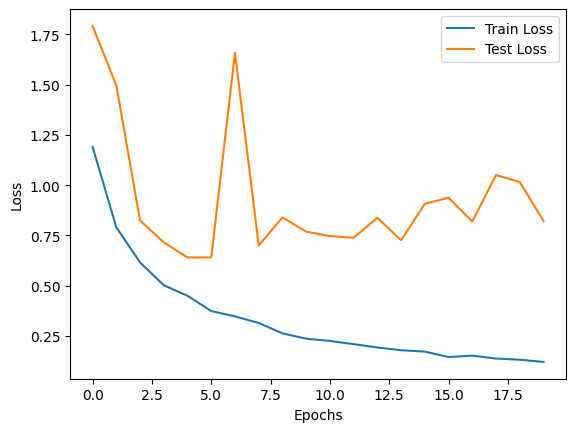

In [ ]:
plt.plot(range(20), train_loss, label = "Train Loss")
plt.plot(range(20), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

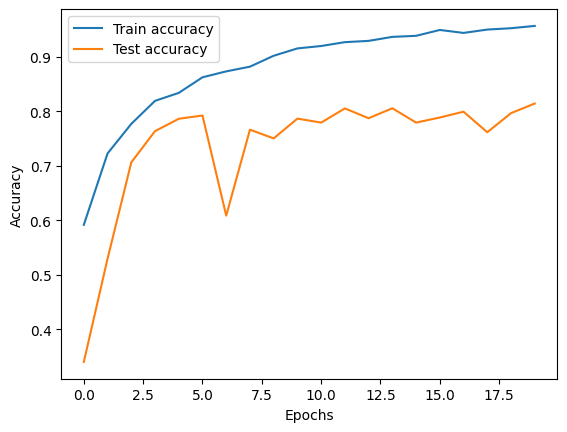

In [ ]:
plt.plot(range(20), train_accuracy, label = "Train accuracy")
plt.plot(range(20), test_accuracy, label = "Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
pred_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir("seg_pred/seg_pred")]

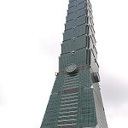

Model Prediction:  forest


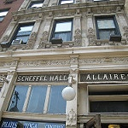

Model Prediction:  sea


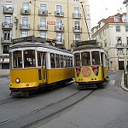

Model Prediction:  street


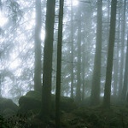

Model Prediction:  forest


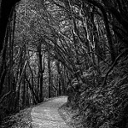

Model Prediction:  forest


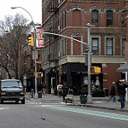

Model Prediction:  buildings


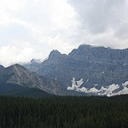

Model Prediction:  mountain


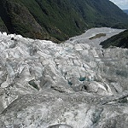

Model Prediction:  glacier


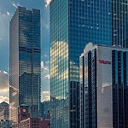

Model Prediction:  buildings


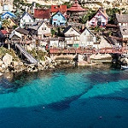

Model Prediction:  glacier


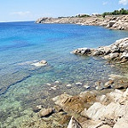

Model Prediction:  sea


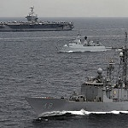

Model Prediction:  sea


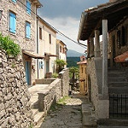

Model Prediction:  street


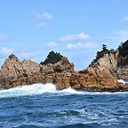

Model Prediction:  glacier


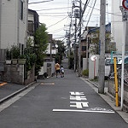

Model Prediction:  street


In [ ]:
for i in range(15):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128,128))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ", idx_to_classes[pred])
  print("=======================================")

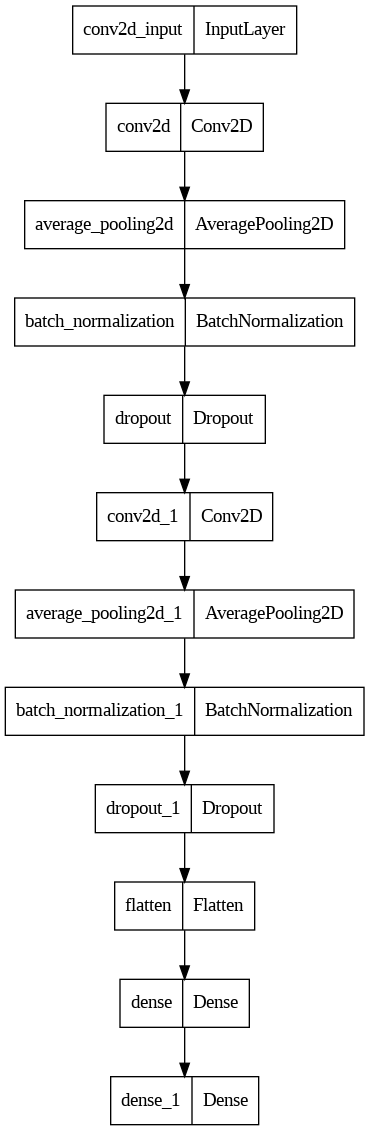

In [ ]:
import pydot
from keras.utils import plot_model

plot_model(model, to_file='model.png')

60/60 [==============================] - 18s 306ms/step


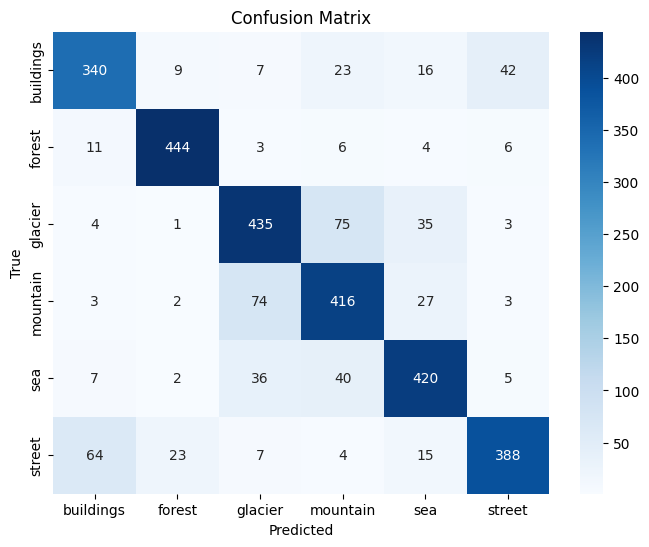

Classification Report:
               precision    recall  f1-score   support

   buildings       0.79      0.78      0.79       437
      forest       0.92      0.94      0.93       474
     glacier       0.77      0.79      0.78       553
    mountain       0.74      0.79      0.76       525
         sea       0.81      0.82      0.82       510
      street       0.87      0.77      0.82       501

    accuracy                           0.81      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.81      0.81      3000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Convert predictions to classes
def get_predictions(model, data_loader):
    predictions = model.predict(data_loader)
    return np.argmax(predictions, axis=1)

# Get true labels
y_true = []
for i in range(len(test_loader)):
    _, labels = test_loader[i]
    y_true.extend(np.argmax(labels, axis=1))

# Get predicted labels
y_pred = get_predictions(model, test_loader)

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=train_loader.class_indices.keys(), yticklabels=train_loader.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
class_report = classification_report(y_true, y_pred, target_names=train_loader.class_indices.keys())
print("Classification Report:\n", class_report)


In [ ]:

# Introduce data augmentation
augmented_img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Create new data generators with data augmentation
augmented_train_loader = augmented_img_gen.flow_from_directory(
    directory="seg_train/seg_train",
    target_size=(128, 128),
    batch_size=50,
    seed=42,
)

augmented_test_loader = img_gen.flow_from_directory(
    directory="seg_test/seg_test",
    target_size=(128, 128),
    batch_size=50,
    seed=42,
)

# Train the model with data augmentation
augmented_model = model.fit_generator(
    generator=augmented_train_loader,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=augmented_test_loader,
    validation_steps=test_steps)

# Evaluate and print the augmented model results
augmented_model_evaluation = model.evaluate(augmented_test_loader, steps=test_steps)
print("Augmented Model Evaluation - Loss: {:.4f}, Accuracy: {:.4f}".format(
    augmented_model_evaluation[0], augmented_model_evaluation[1]))



Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


<ipython-input-18-da573012c463>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  augmented_model = model.fit_generator(


Epoch 1/20
281/281 [==============================] - 277s 985ms/step - loss: 0.7447 - accuracy: 0.7527 - val_loss: 0.5678 - val_accuracy: 0.8123
Epoch 2/20
281/281 [==============================] - 277s 984ms/step - loss: 0.5974 - accuracy: 0.7845 - val_loss: 0.6690 - val_accuracy: 0.8053
Epoch 3/20
281/281 [==============================] - 275s 977ms/step - loss: 0.5666 - accuracy: 0.8001 - val_loss: 0.6969 - val_accuracy: 0.7927
Epoch 4/20
281/281 [==============================] - 279s 993ms/step - loss: 0.5402 - accuracy: 0.8060 - val_loss: 0.5705 - val_accuracy: 0.8093
Epoch 5/20
281/281 [==============================] - 280s 997ms/step - loss: 0.5344 - accuracy: 0.8047 - val_loss: 0.4946 - val_accuracy: 0.8310
Epoch 6/20
281/281 [==============================] - 279s 992ms/step - loss: 0.5211 - accuracy: 0.8056 - val_loss: 0.5740 - val_accuracy: 0.8200
Epoch 7/20
281/281 [==============================] - 283s 1s/step - loss: 0.5182 - accuracy: 0.8126 - val_loss: 0.7243 - va

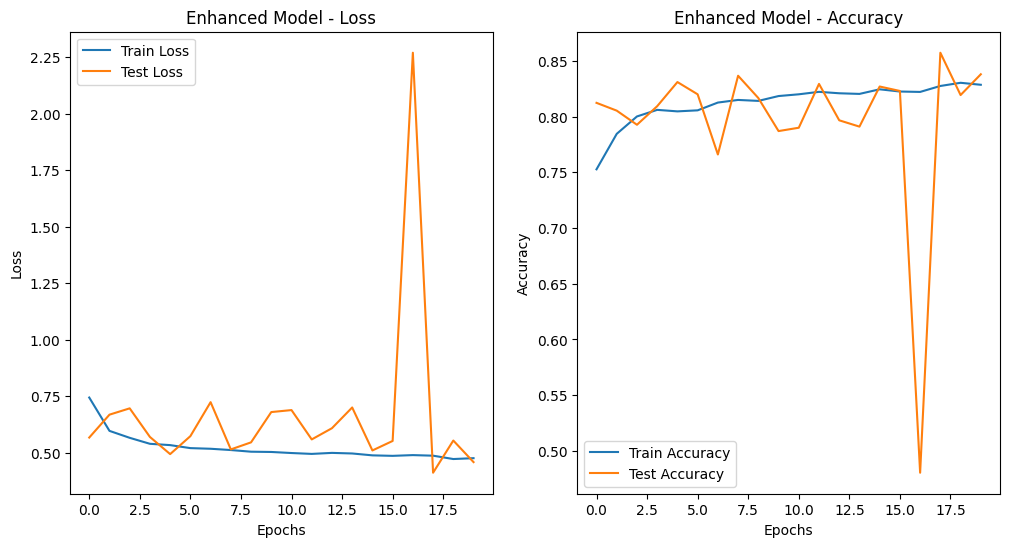

In [ ]:
# Extract metrics
enhanced_train_loss = augmented_model.history["loss"]
enhanced_train_accuracy = augmented_model.history["accuracy"]
enhanced_test_loss = augmented_model.history["val_loss"]
enhanced_test_accuracy = augmented_model.history["val_accuracy"]

# Plot enhanced model results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(20), enhanced_train_loss, label="Train Loss")
plt.plot(range(20), enhanced_test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Enhanced Model - Loss")

plt.subplot(1, 2, 2)
plt.plot(range(20), enhanced_train_accuracy, label="Train Accuracy")
plt.plot(range(20), enhanced_test_accuracy, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Enhanced Model - Accuracy")

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')